In [13]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string

columns = ['id', 'sentence 1', 'sentence 2', 'gold label']
training_data = '/kaggle/input/mlfinal/MLFinalProject-main/train_with_label.txt'
development_data = '/kaggle/input/mlfinal/MLFinalProject-main/dev_with_label.txt'
test_data = '/kaggle/input/mlfinal/MLFinalProject-main/test_without_label.txt'

df_test = pd.read_csv(test_data, sep = '\t+', names = ['id','sentence 1', 'sentence 2'])#.apply(lambda x: x.astype(str).str.lower())

df_dev = pd.read_csv(development_data, sep = '\t+', names = columns)#.apply(lambda x: x.astype(str).str.lower())

df_dev['gold label'] = pd.to_numeric(df_dev['gold label'], errors='coerce')
df_dev = df_dev.dropna().reset_index(drop = True)
df_dev['gold label'] = df_dev['gold label'].astype(int)

df = pd.read_csv(training_data, sep = '\t+', names = columns)#.apply(lambda x: x.astype(str).str.lower())

df['gold label'] = pd.to_numeric(df['gold label'], errors='coerce')
df = df.dropna()
df['gold label'] = df['gold label'].astype(int)

#Lists information of columns and respective data types
df.info() 
df_dev.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7801 entries, 0 to 7800
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7801 non-null   object
 1   sentence 1  7801 non-null   object
 2   sentence 2  7801 non-null   object
 3   gold label  7801 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 304.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4000 non-null   object
 1   sentence 1  4000 non-null   object
 2   sentence 2  4000 non-null   object
 3   gold label  4000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [14]:
df.head()

,id,sentence 1,sentence 2,gold label
0,train_id_0,"Is it in the food supply ? "" says David Ropeik...",The pound also made progress against the dolla...,0
1,train_id_1,"Hundreds of soldiers were involved , an appare...","Avants , wearing a light brown jumpsuit , had ...",0
2,train_id_2,"And Sen. Michael Crapo , R-Idaho , chairman of...",". 's Kempthorne of friend longtime a is , nomi...",0
3,train_id_3,"The gunman , 26-year-old Harold Kilpatrick jnr...",""" In fact , I was physically sick several time...",0
4,train_id_4,"The League of United Latin American Citizens ,...",No. 2 HP saw its Unix server sales dropped 3.6...,0


In [15]:
#Count how many words are in each sentence

df['words_1'] = df['sentence 1'].str.split().str.len()
df['words_2'] = df['sentence 2'].str.split().str.len()
df['wordcount difference'] = abs(df['sentence 1'].str.split().str.len() - df['sentence 2'].str.split().str.len())


df_dev['words_1'] = df_dev['sentence 1'].str.split().str.len()
df_dev['words_2'] = df_dev['sentence 2'].str.split().str.len()
df_dev['wordcount difference'] = abs(df_dev['sentence 1'].str.split().str.len() - df_dev['sentence 2'].str.split().str.len())

df_test['words_1'] = df_test['sentence 1'].str.split().str.len()
df_test['words_2'] = df_test['sentence 2'].str.split().str.len()
df_test['wordcount difference'] = abs(df_test['sentence 1'].str.split().str.len() - df_test['sentence 2'].str.split().str.len())

df.head()

,id,sentence 1,sentence 2,gold label,words_1,words_2,wordcount difference
0,train_id_0,"Is it in the food supply ? "" says David Ropeik...",The pound also made progress against the dolla...,0,24,17,7
1,train_id_1,"Hundreds of soldiers were involved , an appare...","Avants , wearing a light brown jumpsuit , had ...",0,23,44,21
2,train_id_2,"And Sen. Michael Crapo , R-Idaho , chairman of...",". 's Kempthorne of friend longtime a is , nomi...",0,27,27,0
3,train_id_3,"The gunman , 26-year-old Harold Kilpatrick jnr...",""" In fact , I was physically sick several time...",0,25,49,24
4,train_id_4,"The League of United Latin American Citizens ,...",No. 2 HP saw its Unix server sales dropped 3.6...,0,29,16,13


In [16]:
#Find token_set_ratio using Levenshtein Distance via python package Fuzzywuzzy 

from fuzzywuzzy import fuzz
df['fuzz ratio'] = df.apply(lambda row: fuzz.ratio(row['sentence 1'].translate(str.maketrans('', '', string.punctuation)), row['sentence 2'].translate(str.maketrans('', '', string.punctuation))), axis = 1)

df_dev['fuzz ratio'] = df_dev.apply(lambda row2: fuzz.ratio(row2['sentence 1'].translate(str.maketrans('', '', string.punctuation)), row2['sentence 2'].translate(str.maketrans('', '', string.punctuation))), axis = 1)

df_test['fuzz ratio'] = df_test.apply(lambda row2: fuzz.ratio(row2['sentence 1'].translate(str.maketrans('', '', string.punctuation)), row2['sentence 2'].translate(str.maketrans('', '', string.punctuation))), axis = 1)

In [17]:
#Find words that overlap
def getOverlap(s1,s2):
    s2 = s2.lower()
    s1 = s1.lower()
    s2List = s2.split(" ")
    s1List = s1.split(" ")
    return len(list(set(s2List)&set(s1List)))


In [18]:
df['overlapping words'] = df.apply(lambda row: getOverlap(row['sentence 1'], row['sentence 2']), axis = 1)
df_dev['overlapping words'] = df_dev.apply(lambda row: getOverlap(row['sentence 1'], row['sentence 2']), axis = 1)
df_test['overlapping words'] = df_test.apply(lambda row: getOverlap(row['sentence 1'], row['sentence 2']), axis = 1)

df.head()

,id,sentence 1,sentence 2,gold label,words_1,words_2,wordcount difference,fuzz ratio,overlapping words
0,train_id_0,"Is it in the food supply ? "" says David Ropeik...",The pound also made progress against the dolla...,0,24,17,7,41,4
1,train_id_1,"Hundreds of soldiers were involved , an appare...","Avants , wearing a light brown jumpsuit , had ...",0,23,44,21,71,22
2,train_id_2,"And Sen. Michael Crapo , R-Idaho , chairman of...",". 's Kempthorne of friend longtime a is , nomi...",0,27,27,0,42,23
3,train_id_3,"The gunman , 26-year-old Harold Kilpatrick jnr...",""" In fact , I was physically sick several time...",0,25,49,24,69,23
4,train_id_4,"The League of United Latin American Citizens ,...",No. 2 HP saw its Unix server sales dropped 3.6...,0,29,16,13,30,2


In [19]:
#Find difference in character count
df['char 1'] = df['sentence 1'].str.len()
df['char 2'] = df['sentence 2'].str.len()
df['char difference'] = abs(df['char 1'] - df['char 2'])

df_dev['char 1'] = df_dev['sentence 1'].str.len()
df_dev['char 2'] = df_dev['sentence 2'].str.len()
df_dev['char difference'] = abs(df_dev['char 1'] - df_dev['char 2'])

df_test['char 1'] = df_test['sentence 1'].str.len()
df_test['char 2'] = df_test['sentence 2'].str.len()
df_test['char difference'] = abs(df_test['char 1'] - df_test['char 2'])

In [20]:
#Using package difflib to import SequenceMatcher gestalt pattern matching
from difflib import SequenceMatcher
df['sequence matcher'] = df.apply(lambda row: SequenceMatcher(None, row['sentence 1'], row['sentence 2']).ratio(), axis = 1)
df_dev['sequence matcher'] = df_dev.apply(lambda row: SequenceMatcher(None, row['sentence 1'], row['sentence 2']).ratio(), axis = 1)
df_test['sequence matcher'] = df_test.apply(lambda row: SequenceMatcher(None, row['sentence 1'], row['sentence 2']).ratio(), axis = 1)

In [21]:
df['Overlapping ratio'] = df['overlapping words']/df[['words_1','words_2']].min(axis=1)*2
df_dev['Overlapping ratio'] = df_dev['overlapping words']/df_dev[['words_1','words_2']].min(axis=1)*2
df_test['Overlapping ratio'] = df_test['overlapping words']/df_test[['words_1','words_2']].min(axis=1)*2

In [22]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
import nltk 
from nltk.corpus import wordnet

def getSynonyms(s1, s2):
    synonyms = []
    antonyms = []
    synamount = 0
    antamount = 0
    w1 = set(s1.translate(str.maketrans('', '', string.punctuation)).split(" "))
    w2 = set(s2.translate(str.maketrans('', '', string.punctuation)).split(" "))
    
    for i in w1:
        for syn in wordnet.synsets(i):
            for lemma in syn.lemmas():
                synonyms.append(lemma.name())
                if lemma.antonyms():
                    antonyms.append(lemma.antonyms()[0].name())
                    
    for synonym in set(synonyms):
        if synonym in w2:
            synamount += 1
            
    return synamount

In [24]:
df['synonyms'] = df.apply(lambda row: getSynonyms(row['sentence 1'], row['sentence 2']), axis = 1)
df_dev['synonyms'] = df_dev.apply(lambda row: getSynonyms(row['sentence 1'], row['sentence 2']), axis = 1)
df_test['synonyms'] = df_test.apply(lambda row: getSynonyms(row['sentence 1'], row['sentence 2']), axis = 1)

In [25]:
df['synonym ratio'] = df['synonyms']/df[['words_1','words_2']].min(axis=1)*2
df_dev['synonym ratio'] = df_dev['synonyms']/df_dev[['words_1','words_2']].min(axis=1)*2
df_test['synonym ratio'] = df_test['synonyms']/df_test[['words_1','words_2']].min(axis=1)*2

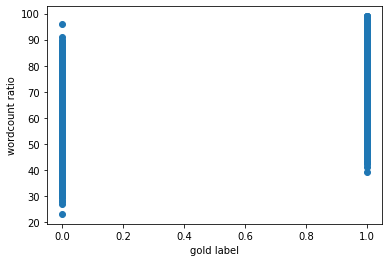

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df['gold label'], df['fuzz ratio'])

plt.xlabel('gold label')
plt.ylabel('wordcount ratio')
 
plt.show()

In [27]:
#development
import sklearn
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#features = ['wordcount difference', 'fuzz ratio', 'overlapping words', 'char difference', 'sequence matcher', 'wordcount ratio', 'synonyms', 'synonym ratio']
features = ['wordcount difference', 'sequence matcher', 'Overlapping ratio', 'synonym ratio']
X_train = df[features]
X_dev = df_dev[features]
y_train = df['gold label']
y_dev = df_dev['gold label']

classifier = make_pipeline(StandardScaler(), svm.SVC(kernel = 'rbf', gamma = 1, C = 1, class_weight = 'balanced'))
#classifier = make_pipeline(StandardScaler(), svm.SVC())
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_dev)
print(classifier.score(X_dev, y_dev))

X_test = df_test[features]
y_test_pred = classifier.predict(X_test)

0.879


In [28]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                    max_iter = 200)

clf.fit(X_train, y_train)

Iteration 1, loss = 0.65855028
Iteration 2, loss = 0.35327411
Iteration 3, loss = 0.27035301
Iteration 4, loss = 0.23697217
Iteration 5, loss = 0.22342808
Iteration 6, loss = 0.21522856
Iteration 7, loss = 0.21040345
Iteration 8, loss = 0.21157636
Iteration 9, loss = 0.21051722
Iteration 10, loss = 0.20755145
Iteration 11, loss = 0.20904243
Iteration 12, loss = 0.20483885
Iteration 13, loss = 0.20890330
Iteration 14, loss = 0.20408565
Iteration 15, loss = 0.20408603
Iteration 16, loss = 0.20148360
Iteration 17, loss = 0.20345490
Iteration 18, loss = 0.22467117
Iteration 19, loss = 0.20058009
Iteration 20, loss = 0.20068423
Iteration 21, loss = 0.20012287
Iteration 22, loss = 0.19879832
Iteration 23, loss = 0.19896368
Iteration 24, loss = 0.20093497
Iteration 25, loss = 0.19799864
Iteration 26, loss = 0.20049649
Iteration 27, loss = 0.19631211
Iteration 28, loss = 0.19616934
Iteration 29, loss = 0.19556336
Iteration 30, loss = 0.19520255
Iteration 31, loss = 0.19760455
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [29]:
#Calculate classifier score
ypred=clf.predict(X_dev)
print(clf.score(X_dev, y_dev))

0.897


In [30]:
#Calculate f1 Score
f1 = sklearn.metrics.f1_score(y_dev, ypred, average='weighted')
print(f1)

0.8991117498537455


In [31]:
# Test for Overfitting by using model on training and development data

# Evaluate the model on the training set
train_acc = clf.score(X_train, y_train)
print("train_acc = " + str(train_acc))

# Evaluate the model on the development set
dev_acc = clf.score(X_dev, y_dev)
print("dev_acc = " + str(dev_acc))

#Seeing how both numbers are very similar, this is a sign that the model is not overfitting 

train_acc = 0.905653121394693
dev_acc = 0.897


In [37]:
from sklearn.model_selection import cross_val_score

# Split the data into 5 folds
folds = 5

# Use cross-validation to evaluate the models on the data
dev_score = cross_val_score(clf, X_dev, y_dev)
train_score = cross_val_score(clf, X_train, y_train)

Iteration 1, loss = 0.86076609
Iteration 2, loss = 0.53266659
Iteration 3, loss = 0.42165692
Iteration 4, loss = 0.35622400
Iteration 5, loss = 0.31223322
Iteration 6, loss = 0.28411696
Iteration 7, loss = 0.26375200
Iteration 8, loss = 0.25119219
Iteration 9, loss = 0.24195520
Iteration 10, loss = 0.23896512
Iteration 11, loss = 0.23490220
Iteration 12, loss = 0.23037261
Iteration 13, loss = 0.22816744
Iteration 14, loss = 0.22627713
Iteration 15, loss = 0.22647060
Iteration 16, loss = 0.22458732
Iteration 17, loss = 0.22117561
Iteration 18, loss = 0.22007919
Iteration 19, loss = 0.21893535
Iteration 20, loss = 0.21789368
Iteration 21, loss = 0.21785915
Iteration 22, loss = 0.21769285
Iteration 23, loss = 0.21542488
Iteration 24, loss = 0.21540489
Iteration 25, loss = 0.21361199
Iteration 26, loss = 0.21630987
Iteration 27, loss = 0.21544792
Iteration 28, loss = 0.21450559
Iteration 29, loss = 0.21651216
Iteration 30, loss = 0.21777531
Iteration 31, loss = 0.21454441
Iteration 32, los

In [38]:
# Print the average score across all folds for Training and Development data
print("Average score for Training: ", dev_score.mean())
print("Average score for Development: ", train_score.mean())

Average score for Training:  0.892
Average score for Development:  0.9083455707222523


In [39]:
#Check number of 1 and 0 outputs
x = 0
for i in range(df_test.shape[0]):
    if y_test_pred[i] == 1:
        x+=1

print("Total: " + str(len(y_pred)))
print("1: " + str(x))
print("0: " + str(len(y_pred) - x))

Total: 4000
1: 1441
0: 2559


In [40]:
#Output results into a file
file = open('SiddarthSrinivasan_test_result.txt',"w")
df_test.reindex()
for i in range(df_test.shape[0]):
    print(df_test.loc[i,'id'],"\t",y_test_pred[i],file = file)
file.close()